In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


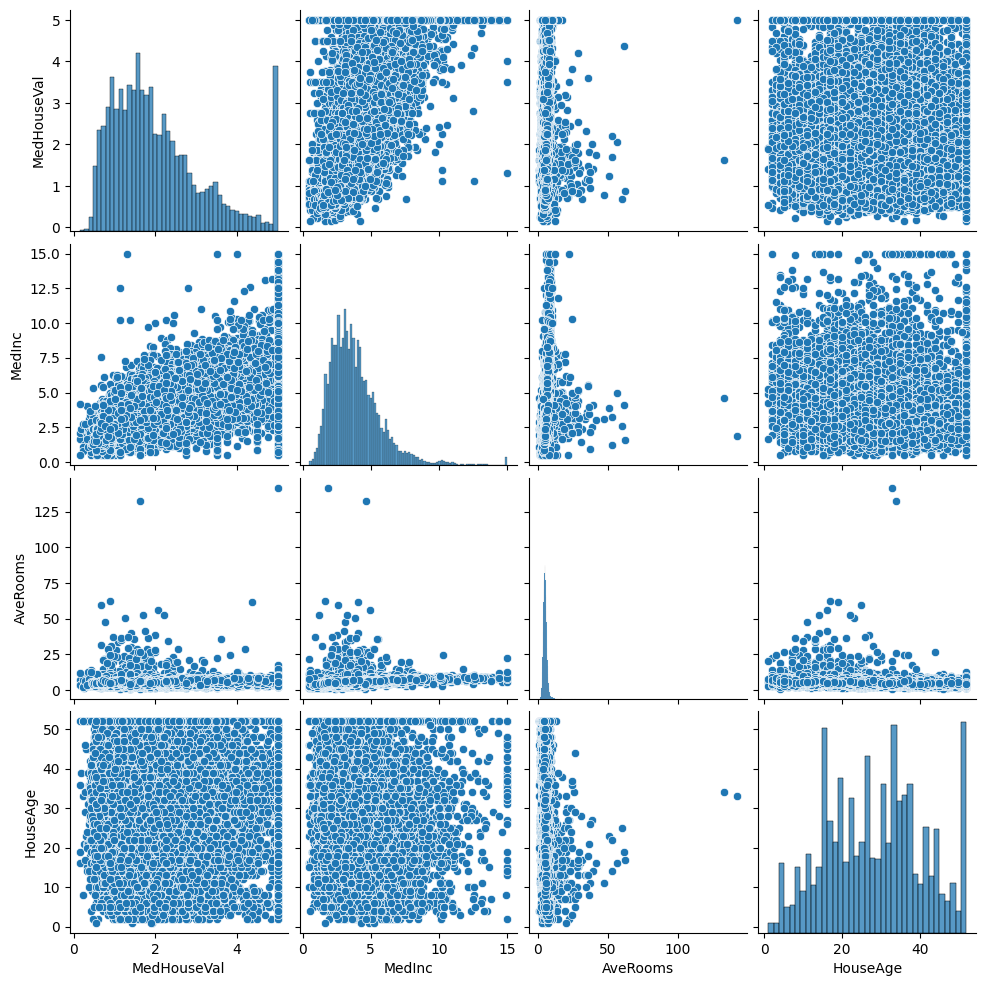

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['MedHouseVal', 'MedInc', 'AveRooms', 'HouseAge']])

In [6]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
import numpy as np
df['MedHouseVal'] = np.log1p(df['MedHouseVal'])

In [8]:
df['MedHouseVal']

0        1.709464
1        1.522790
2        1.508733
3        1.484555
4        1.486592
           ...   
20635    0.577175
20636    0.571544
20637    0.653886
20638    0.613563
20639    0.638691
Name: MedHouseVal, Length: 20640, dtype: float64

In [9]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=24)

In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

model = XGBRegressor(random_state=24)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
y_pred = model.predict(X_test)
print(f'Predicted Values : {y_pred}')

Predicted Values : [1.2656041  0.704213   1.3559262  ... 0.56535625 1.0244212  1.3977065 ]


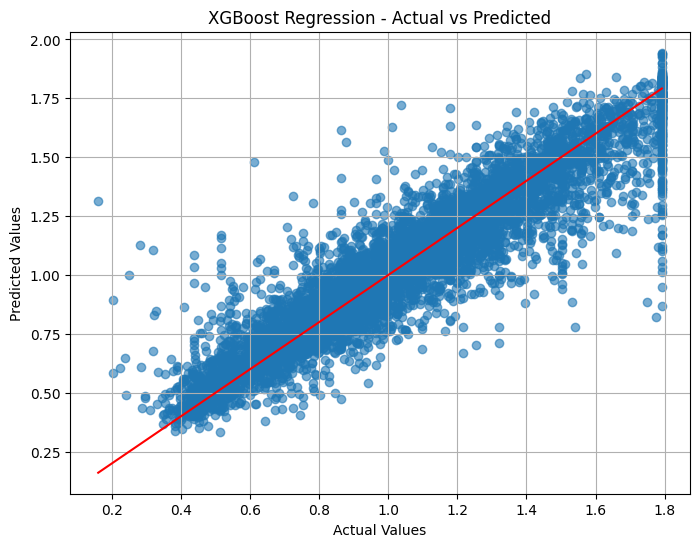

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regression - Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # ideal line
plt.grid(True)
plt.show()

In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2_score(y_test,y_pred)}')

MSE: 0.019524389636056714
RMSE: 0.1397297020538465
R2 Score: 0.8468185540868924


In [14]:
model.feature_importances_

array([0.48699647, 0.05114984, 0.06456733, 0.02085018, 0.02360391,
       0.12015896, 0.11437494, 0.1182984 ], dtype=float32)

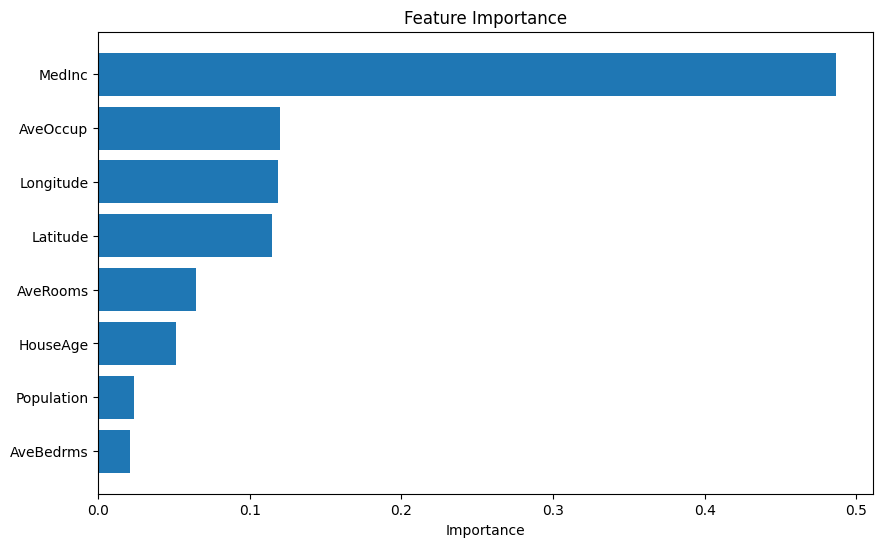

In [15]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.05, 0.1, 0.01],
    'max_depth': [5, 8, 12, 20, 30],
    'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.01],
                         'max_depth': [5, 8, 12, 20, 30],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [18]:
print(f'Best Parameters : {grid.best_params_}')
print(f"Best Score : {grid.best_score_}")

Best Parameters : {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 500}
Best Score : -0.14022643749368735


In [20]:
y_pred_grid = grid.predict(X_test)
print(y_pred_grid)

[1.3515478  0.74059945 1.3913198  ... 0.60365736 1.0902058  1.4051406 ]
